# Clustering Lab

 
Based of the amazing work you did in the Movie Industry you've been recruited to the NBA! You are working as the VP of Analytics that helps support a head scout, Mr. Rooney, for the worst team in the NBA probably the Wizards. Mr. Rooney just heard about Data Science and thinks it can solve all the team's problems!!! He wants you to figure out a way to find players that are high performing but maybe not highly paid that you can steal to get the team to the playoffs! 

In this document you will work through a similar process that we did in class with the NBA data (NBA_Perf_22 and nba_salaries_22), merging them together.

Details: 

- Determine a way to use clustering to estimate based on performance if 
players are under or over paid, generally. 

- Then select players you believe would be best for your team and explain why. Do so in three categories: 
    * Examples that are not good choices (3 or 4) 
    * Several options that are good choices (3 or 4)
    * Several options that could work, assuming you can't get the players in the good category (3 or 4)

- You will decide the cutoffs for each category, so you should be able to explain why you chose them.

- Provide a well commented and clean report of your findings in a separate notebook that can be presented to Mr. Rooney, keeping in mind he doesn't understand...anything. Include a rationale for variables you included in the model, details on your approach and a overview of the results with supporting visualizations. 


Hints:

- Salary is the variable you are trying to understand 
- When interpreting you might want to use graphs that include variables that are the most correlated with Salary
- You'll need to scale the variables before performing the clustering
- Be specific about why you selected the players that you did, more detail is better
- Use good coding practices, comment heavily, indent, don't use for loops unless totally necessary and create modular sections that align with some outcome. If necessary create more than one script,list/load libraries at the top and don't include libraries that aren't used. 
- Be careful for non-traditional characters in the players names, certain graphs won't work when these characters are included.


In [1]:
from IPython.display import clear_output
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Load Data:

In [2]:
df_players = pd.read_csv("data/NBA_Perf_22.csv", encoding="latin-1")
df_salaries = pd.read_csv("data/nba_salaries_22.csv")

In [3]:
df_players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,6.1,0.468,0.486,1.1,1.8,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8,5.0,0.548,0.547,1.4,2.6,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3,12.9,0.562,0.557,4.6,6.1,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,2.6,0.560,0.424,0.6,1.0,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,0.3,1.0,0.304,5.1,8.8,0.578,0.566,1.9,2.2,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


In [4]:
df_salaries.head()

,Player,Salary
0,Stephen Curry,"$48,070,014"
1,Russell Westbrook,"$47,063,478"
2,LeBron James,"$44,474,988"
3,Kevin Durant,"$44,119,845"
4,Bradley Beal,"$43,279,250"


# Clean and de-duplicated the data, preprocessing:

In [5]:
df = pd.merge(df_players, df_salaries, how="inner", on="Player")
df.rename(columns = {"2020-21":"Salary"}, inplace=True) 

In [6]:
df.shape

(504, 30)

In [7]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,6.1,0.468,0.486,1.1,1.8,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,"$2,840,160"
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8,5.0,0.548,0.547,1.4,2.6,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,"$17,926,829"
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3,12.9,0.562,0.557,4.6,6.1,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,"$30,351,780"
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,2.6,0.560,0.424,0.6,1.0,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,"$2,094,120"
4,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,0.372,1.6,5.2,0.311,2.3,5.3,0.433,0.449,1.2,1.7,0.743,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6,"$5,009,633"


In [8]:
players_multiple_teams = df[df['Tm'] == "TOT"]
players_multiple_teams = players_multiple_teams.drop_duplicates()
player_multiple_teams_names = players_multiple_teams['Player'].reset_index(drop=True)

In [9]:
df_filtered = df[~df['Player'].isin(player_multiple_teams_names)].copy()

In [10]:
df_clean = pd.concat([players_multiple_teams,df_filtered], axis=0)
df_clean = df_clean.reset_index(drop=True)
df_clean = df_clean.drop_duplicates()

In [11]:
df_clean.shape

(391, 30)

# Begin Cleaning and dropping columns now that our data is in acceptable format:

In [12]:
df_clean.isna().sum()

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%       13
2P         0
2PA        0
2P%        1
eFG%       0
FT         0
FTA        0
FT%        7
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Salary     1
dtype: int64

In [13]:
#strange stubborn NA salary value, removed manually:
df_clean = df_clean[df_clean['Player'] != "Ish Wainright"]
df_clean = df_clean.fillna(0)

In [14]:
cols_to_save = ['Player', 'Pos', 'Tm', 'Age']

# for matching players later:
df_saved = df_clean[cols_to_save].copy()

In [15]:
cols_to_drop = ['Player', 'Tm', 'G', 'GS', 'MP' ,'FG' ,'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'TRB']

df_dropped = df_clean.drop(columns = cols_to_drop)

In [16]:
df_dropped['Salary'] = df_dropped['Salary'].str.replace("$","")
df_dropped['Salary'] = df_dropped['Salary'].str.replace(",","")
df_dropped['Salary'] = df_dropped['Salary'].astype(int)

In [17]:
df_dropped.head()

,Pos,Age,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,SG,23,0.372,0.311,0.433,0.449,0.743,0.6,2.3,2.4,0.7,0.4,1.4,1.6,10.6,5009633
1,PG,34,0.423,0.415,0.448,0.577,0.884,0.2,1.0,1.9,0.3,0.0,1.0,0.7,5.3,333333
2,PF,22,0.504,0.237,0.579,0.530,0.663,2.2,4.9,0.8,0.5,0.4,0.8,1.9,11.3,12500000
3,C,20,0.538,0.000,0.538,0.538,0.462,1.1,0.6,0.0,0.3,0.1,0.4,0.6,2.9,1782621
4,PG,26,0.387,0.388,0.386,0.518,0.833,0.2,1.5,1.5,0.4,0.2,0.5,1.0,4.2,6025000


In [18]:
df_saved.head()

,Player,Pos,Tm,Age
0,Nickeil Alexander-Walker,SG,TOT,23
1,D.J. Augustin,PG,TOT,34
2,Marvin Bagley III,PF,TOT,22
3,Vernon Carey Jr.,C,TOT,20
4,Jevon Carter,PG,TOT,26


# Data needs pre-processing now, categoricals and scaling etc:

In [19]:
df_dropped.head()

,Pos,Age,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,SG,23,0.372,0.311,0.433,0.449,0.743,0.6,2.3,2.4,0.7,0.4,1.4,1.6,10.6,5009633
1,PG,34,0.423,0.415,0.448,0.577,0.884,0.2,1.0,1.9,0.3,0.0,1.0,0.7,5.3,333333
2,PF,22,0.504,0.237,0.579,0.530,0.663,2.2,4.9,0.8,0.5,0.4,0.8,1.9,11.3,12500000
3,C,20,0.538,0.000,0.538,0.538,0.462,1.1,0.6,0.0,0.3,0.1,0.4,0.6,2.9,1782621
4,PG,26,0.387,0.388,0.386,0.518,0.833,0.2,1.5,1.5,0.4,0.2,0.5,1.0,4.2,6025000


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define transformers for categorical and numerical columns
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute with the most frequent value
        ('onehot', OneHotEncoder(handle_unknown='ignore'))    # One-hot encode categorical variables
    ])

numerical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),          # Impute with mean value
        ('scaler', StandardScaler())                           # Standardize numerical variables
    ])


numerical_cols = df_dropped.select_dtypes(include=['int', 'float']).columns
categorical_cols = df_dropped.select_dtypes(include=['object', 'category']).columns

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

In [21]:
data = preprocessor.fit_transform(df_dropped)

# Test with best guess: 

In [22]:
from sklearn.cluster import KMeans

#intuitive to around 2-3 likely being the best
model_test = KMeans(n_clusters=5, random_state=42)

#train model, assign clusters:
model_test.fit(data)


#centroids and labels
labels = pd.Series(model_test.labels_)
clusters = model_test.cluster_centers_

clear_output()

In [23]:
df_test = pd.concat([labels, df_dropped], axis=1)
df_test.rename(columns={0:"Cluster"}, inplace=True)
df_test.head()

,Cluster,Pos,Age,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,3.0,SG,23.0,0.372,0.311,0.433,0.449,0.743,0.6,2.3,2.4,0.7,0.4,1.4,1.6,10.6,5009633.0
1,3.0,PG,34.0,0.423,0.415,0.448,0.577,0.884,0.2,1.0,1.9,0.3,0.0,1.0,0.7,5.3,333333.0
2,1.0,PF,22.0,0.504,0.237,0.579,0.530,0.663,2.2,4.9,0.8,0.5,0.4,0.8,1.9,11.3,12500000.0
3,2.0,C,20.0,0.538,0.000,0.538,0.538,0.462,1.1,0.6,0.0,0.3,0.1,0.4,0.6,2.9,1782621.0
4,3.0,PG,26.0,0.387,0.388,0.386,0.518,0.833,0.2,1.5,1.5,0.4,0.2,0.5,1.0,4.2,6025000.0


In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Assuming you have 'X', 'cluster_labels', and 'cluster_centers' from the KMeans example

def plot_centroids(df, xlabel, ylabel, zlabel):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Create the 3D scatter plot
    ax.scatter(df[xlabel], df[ylabel], df[zlabel], c=df['Cluster'])
    
    # Set labels for the axes
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    
    # Set title for the plot
    plt.title('Static 3D Scatter Plot')
    
    # Show the plot
    plt.show()

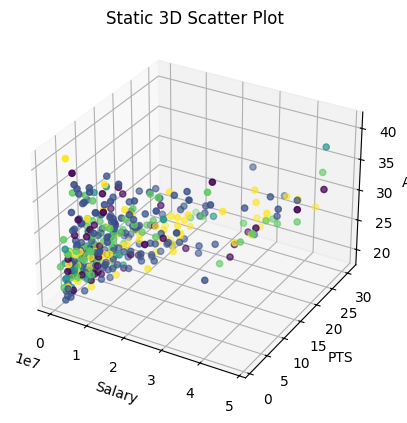

In [25]:
plot_centroids(df_test, "Salary", "PTS", "Age")

# Lets test elbow and silhouette with KMeans:

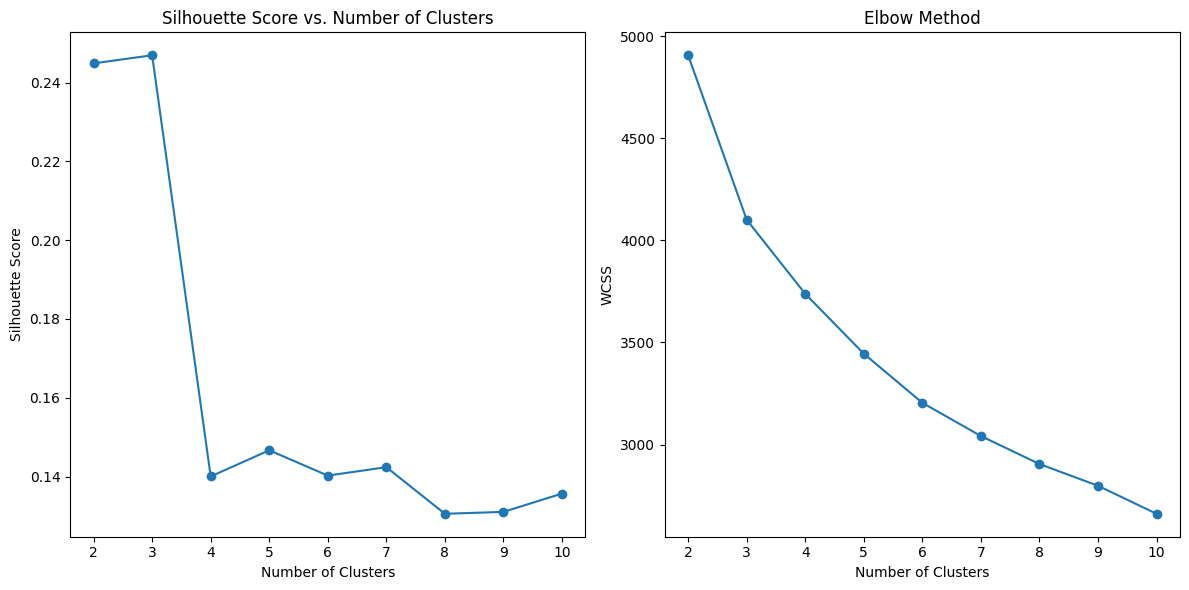

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Assuming you have your data in a variable named 'X'

# Range of possible cluster numbers to try
cluster_range = range(2, 11)  # Adjust the range as needed

# Lists to store the Silhouette Scores and Within-Cluster Sum of Squares (WCSS)
silhouette_scores = []
wcss = []

# Calculate Silhouette Score and WCSS for each cluster number
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(data)
    
    # Silhouette Score
    silhouette_avg = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    # WCSS (Within-Cluster Sum of Squares)
    wcss.append(kmeans.inertia_)

# Plot the Silhouette Score
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

# Plot the Elbow Method (WCSS)
plt.subplot(1, 2, 2)
plt.plot(cluster_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')


clear_output()
plt.tight_layout()
plt.show()


# Now lets train a model using the ideal of 3 clusters, silhouette dives after 3 so I think 3 is going to be our ideal:

In [27]:
#intuitive to around 2-3 likely being the best
model = KMeans(n_clusters=3, random_state=42)

#train model, assign clusters:
model.fit(data)


#centroids and labels
labels = pd.Series(model.labels_)
clusters = model.cluster_centers_

clear_output()

In [28]:
df_evaluate = pd.concat([labels, df_dropped], axis=1)
df_evaluate.rename(columns={0:"Cluster"}, inplace=True)
df_evaluate.head()

,Cluster,Pos,Age,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,2.0,SG,23.0,0.372,0.311,0.433,0.449,0.743,0.6,2.3,2.4,0.7,0.4,1.4,1.6,10.6,5009633.0
1,2.0,PG,34.0,0.423,0.415,0.448,0.577,0.884,0.2,1.0,1.9,0.3,0.0,1.0,0.7,5.3,333333.0
2,0.0,PF,22.0,0.504,0.237,0.579,0.530,0.663,2.2,4.9,0.8,0.5,0.4,0.8,1.9,11.3,12500000.0
3,2.0,C,20.0,0.538,0.000,0.538,0.538,0.462,1.1,0.6,0.0,0.3,0.1,0.4,0.6,2.9,1782621.0
4,2.0,PG,26.0,0.387,0.388,0.386,0.518,0.833,0.2,1.5,1.5,0.4,0.2,0.5,1.0,4.2,6025000.0


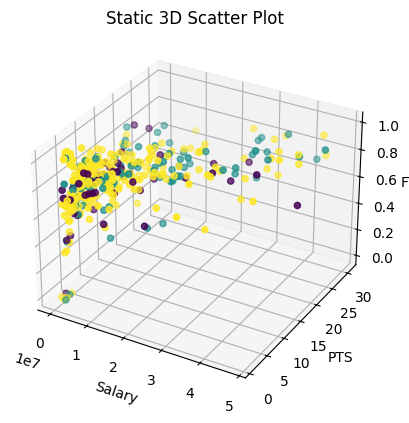

In [64]:
"""
Looks like yellow is the most general cluster while purple and light blue might be where we find our more interesting data points
"""

plot_centroids(df_evaluate, "Salary", "PTS", "FT%")

In [30]:
silhouette_avg = silhouette_score(data, model.labels_)
wcss = model.inertia_

"""
Because we have fewer clusters, the wcss is certainly higher but the silhouette score is maximized which is ideal:
"""

print(f"Silhouette Score: {silhouette_avg}")
print(f"Within Cluster Sum of Squared: {wcss}")

Silhouette Score: 0.24424841106283726
Within Cluster Sum of Squared: 4100.455076910795


# Time to decide on players for Mr. Rooney:

In [31]:
df_choose = pd.concat([df_saved['Player'], df_evaluate], axis=1)

In [32]:
df_choose['Cluster'].value_counts()

Cluster
2.0    243
1.0     97
0.0     50
Name: count, dtype: int64

In [58]:
df_choices_good = df_choose[df_choose['Cluster'] == 0].sort_values(by="Salary", ascending=True)
df_choices_good.head(5)

,Player,Cluster,Pos,Age,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Salary
74,Charles Bassey,0.0,C,21.0,0.638,0.000,0.698,0.638,0.750,1.0,1.7,0.3,0.2,0.7,0.3,1.4,3.0,74742.0
36,Juwan Morgan,0.0,PF,24.0,0.667,0.500,1.000,0.833,0.000,1.0,1.0,0.5,0.0,0.0,0.0,1.5,2.5,576230.0
340,Marko Simonovic,0.0,C,22.0,0.267,0.200,0.300,0.300,0.727,0.6,0.6,0.0,0.1,0.1,0.2,0.7,1.9,1563518.0
383,Aaron Wiggins,0.0,SG,23.0,0.463,0.304,0.573,0.525,0.729,1.0,2.5,1.4,0.6,0.2,1.1,1.9,8.3,1563518.0
342,Jericho Sims,0.0,PF,23.0,0.722,0.000,0.722,0.722,0.414,1.5,2.6,0.5,0.3,0.5,0.5,1.6,2.2,1639842.0


In [61]:
df_choices_bad =  df_choose[df_choose['Cluster'] == 2].sort_values(by="Salary", ascending=True)
df_choices_bad.head()

,Player,Cluster,Pos,Age,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Salary
262,Sam Merrill,2.0,SG,25.0,0.333,0.304,1.000,0.479,0.500,0.2,1.0,0.7,0.0,0.0,0.3,0.5,4.2,150000.0
32,Didi Louzada,2.0,SG-SF,22.0,0.364,0.391,0.300,0.500,1.000,0.6,1.3,0.6,0.2,0.2,0.6,1.4,3.9,268032.0
317,Trevelin Queen,2.0,SG,24.0,0.455,0.375,0.667,0.591,1.000,0.7,0.9,0.4,0.5,0.1,0.7,0.6,4.3,330000.0
1,D.J. Augustin,2.0,PG,34.0,0.423,0.415,0.448,0.577,0.884,0.2,1.0,1.9,0.3,0.0,1.0,0.7,5.3,333333.0
13,Malik Fitts,2.0,PF,24.0,0.421,0.500,0.333,0.553,0.000,0.1,1.0,0.3,0.0,0.0,0.1,0.3,1.4,555217.0


In [63]:
df_choices_passable = df_choose[df_choose['Cluster'] == 1].sort_values(by="Salary", ascending=True)
df_choices_passable.head()

,Player,Cluster,Pos,Age,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Salary
237,Isaiah Livers,1.0,SF,23.0,0.456,0.422,0.538,0.606,0.857,0.8,2.2,1.1,0.7,0.4,0.8,1.9,6.4,1563518.0
99,Greg Brown III,1.0,SF,20.0,0.426,0.311,0.481,0.476,0.677,0.8,2.0,0.7,0.5,0.5,0.8,1.9,4.7,1563518.0
226,Vit Krejci,1.0,SG,21.0,0.407,0.327,0.522,0.503,0.864,0.6,2.8,1.9,0.6,0.3,1.0,2.2,6.2,1563518.0
136,Ayo Dosunmu,1.0,SG,22.0,0.520,0.376,0.596,0.585,0.679,0.4,2.4,3.3,0.8,0.4,1.4,2.4,8.8,1563518.0
107,Jared Butler,1.0,SG,21.0,0.404,0.318,0.524,0.497,0.688,0.1,1.0,1.5,0.4,0.2,0.8,1.1,3.8,1563518.0


In [ ]:
#Write up the results in a separate notebook with supporting visualizations and 
#an overview of how and why you made the choices you did. This should be at least 
#500 words and should be written for a non-technical audience.

In [66]:
"""

Best:

    Our clusters found relative relationships with respect to Salary and performance, cluster 0 found most low salaries with comparable skillsets, this is basically a bang for your buck cluster so we are
    recommending the lowest current salary players from that cluster. 

Passable: 

    Cluster 1 is our "passable" cluster, it has reasonably high salaried players that also have reasonable performance on the court, so for our passable set we are recommending these players. 

Worst: 

    The worst cluster was certainly cluster 2 where almost all of the other players found themselves. These players don't stand out in any measurable way and as a result are difficult to recommend. They
    are also typically expensive so "recommending" these players is like recommending Lebron James.

"""
clear_output()